<a href="https://colab.research.google.com/github/axgervais/AI-Python/blob/main/Projet_apprentissage_non_supervis%C3%A9_ag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Étape 1 : Exploration des Données

Chargement du dataset

In [3]:
import pandas as pd

# Charger le dataset
df = pd.read_excel('/content/Online Retail.xlsx')

# Vérifier que le dataset est bien chargé
print("Dataset chargé avec succès !")
print("Nombre de lignes et colonnes :", df.shape)


Dataset chargé avec succès !
Nombre de lignes et colonnes : (541909, 8)


Étape 1.1 : Aperçu général des données
python

In [4]:
# Aperçu général des données
print(df.head())  # Afficher les premières lignes
print(df.info())  # Afficher la structure et les types des données
print(df.describe(include="all"))  # Afficher les statistiques descriptives


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

Étape 1.2 : Identification des valeurs manquantes
python


In [5]:
# Identification des valeurs manquantes
missing_values = df.isnull().sum()  # Nombre de valeurs manquantes
missing_percent = (missing_values / len(df)) * 100  # Pourcentage de valeurs manquantes

print("Valeurs manquantes :\n", missing_values)
print("\nPourcentage de valeurs manquantes :\n", missing_percent)


Valeurs manquantes :
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Pourcentage de valeurs manquantes :
 InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


Étape 1.3 : Identification des anomalies et valeurs extrêmes

In [6]:
# Identifier les valeurs aberrantes
quantity_outliers = df[df["Quantity"] < 0]  # Quantités négatives
unitprice_outliers = df[df["UnitPrice"] <= 0]  # Prix négatifs ou nuls

print("Quantités négatives :\n", quantity_outliers)
print("\nPrix négatifs ou nuls :\n", unitprice_outliers)


Quantités négatives :
        InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09

Etape 2 : Prétraitement des données


Étape 2.1 : Nettoyage des données


In [7]:
# Supprimer les lignes où des informations importantes sont manquantes
df_cleaned = df.dropna(subset=["CustomerID", "Description"])

# Supprimer les transactions avec des quantités négatives
df_cleaned = df_cleaned[df_cleaned["Quantity"] > 0]

# Supprimer les transactions avec des prix unitaires nuls ou négatifs
df_cleaned = df_cleaned[df_cleaned["UnitPrice"] > 0]

print("Données nettoyées !")
print("Nombre de lignes après nettoyage :", df_cleaned.shape)

# Étape 2.2 : Création d'une variable de montant total
df_cleaned["TotalAmount"] = df_cleaned["Quantity"] * df_cleaned["UnitPrice"]

# Vérifier le dataset après ajout de la nouvelle colonne
print("Montant total par transaction ajouté !")
print(df_cleaned.head())


Données nettoyées !
Nombre de lignes après nettoyage : (397884, 8)
Montant total par transaction ajouté !
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  


Étape 2.2 : Création d'une variable de montant total


In [8]:
df_cleaned["TotalAmount"] = df_cleaned["Quantity"] * df_cleaned["UnitPrice"]

# Vérifier le dataset après ajout de la nouvelle colonne
print("Montant total par transaction ajouté !")
print(df_cleaned.head())

Montant total par transaction ajouté !
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  


Étape 3 : Création des Variables pour la Segmentation (Feature Engineering)


In [9]:
import datetime as dt

# Définir une date de référence (par exemple, un jour après la dernière date du dataset)
reference_date = df_cleaned["InvoiceDate"].max() + dt.timedelta(days=1)

customer_data = df_cleaned.groupby("CustomerID").agg(
    TotalSpent=("TotalAmount", "sum"),                # Montant total dépensé
    Frequency=("InvoiceNo", "nunique"),              # Nombre total de factures
    LastPurchase=("InvoiceDate", "max")              # Date de la dernière transaction
).reset_index()

# Calculer la récence (nombre de jours depuis la dernière transaction)
customer_data["Recency"] = (reference_date - customer_data["LastPurchase"]).dt.days

# Supprimer la colonne LastPurchase (non nécessaire pour la segmentation)
customer_data.drop(columns=["LastPurchase"], inplace=True)

print("Variables agrégées créées avec succès !")
print(customer_data.head())


Variables agrégées créées avec succès !
   CustomerID  TotalSpent  Frequency  Recency
0     12346.0    77183.60          1      326
1     12347.0     4310.00          7        2
2     12348.0     1797.24          4       75
3     12349.0     1757.55          1       19
4     12350.0      334.40          1      310


Étape 4 : Application des Techniques d'Apprentissage Non Supervisé


Étape 4.1 : Standardisation des données
Avant de réaliser le clustering, les données doivent être standardisées pour que chaque variable ait une contribution égale.

In [10]:
from sklearn.preprocessing import StandardScaler

# Standardisation des données
features = ["TotalSpent", "Frequency", "Recency"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data[features])

print("Données standardisées avec succès !")


Données standardisées avec succès !


Étape 4.2 : Clustering K-means
Utiliser la méthode du coude (Elbow Method) pour déterminer le nombre optimal de clusters.
Appliquer K-means et analyser les clusters.

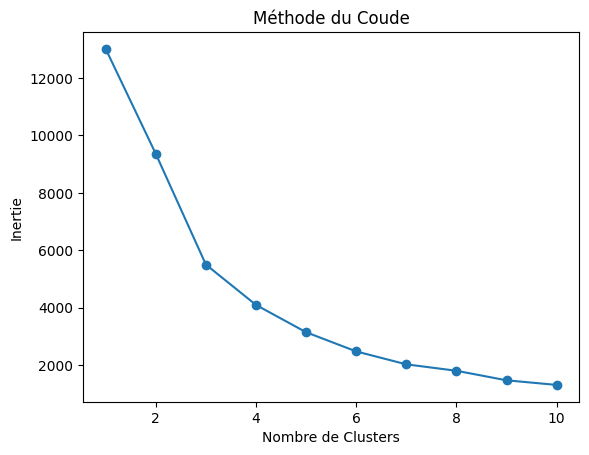

Clustering K-means appliqué avec succès !
   CustomerID  TotalSpent  Frequency  Recency  Cluster
0     12346.0    77183.60          1      326        3
1     12347.0     4310.00          7        2        0
2     12348.0     1797.24          4       75        0
3     12349.0     1757.55          1       19        0
4     12350.0      334.40          1      310        1


In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Trouver le nombre optimal de clusters (méthode du coude)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualiser la méthode du coude
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie')
plt.title('Méthode du Coude')
plt.show()

# Appliquer K-means avec le nombre optimal de clusters
optimal_clusters = 4  # Remplacez par le nombre trouvé avec la méthode du coude
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(X_scaled)

print("Clustering K-means appliqué avec succès !")
print(customer_data.head())


Étape 4.3 : Clustering Hiérarchique
Appliquer un clustering hiérarchique et générer un dendrogramme pour visualiser les clusters.

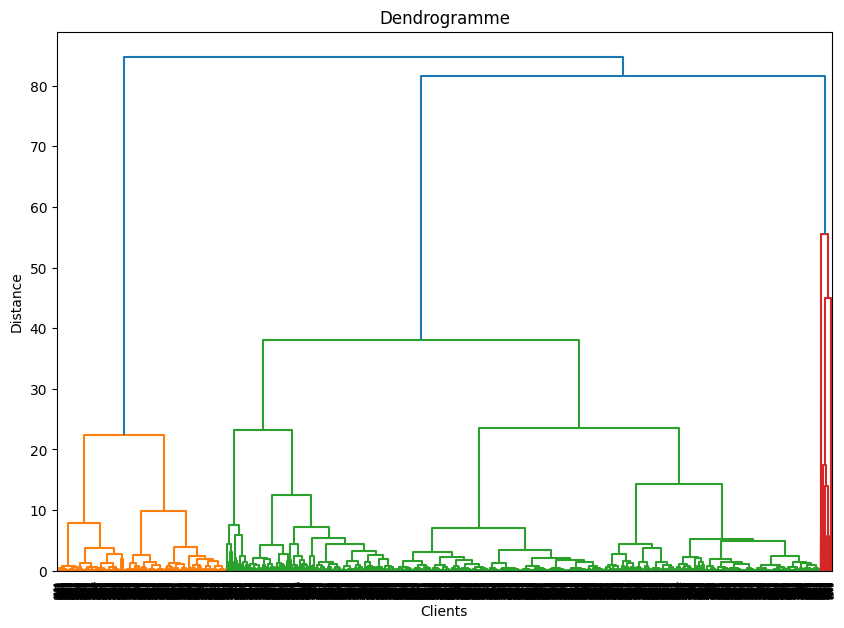

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Clustering hiérarchique
linked = linkage(X_scaled, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogramme')
plt.xlabel('Clients')
plt.ylabel('Distance')
plt.show()


Étape 4.4 : Réduction de dimension (PCA)
Réduire les dimensions à 2 ou 3 pour visualiser les clusters.

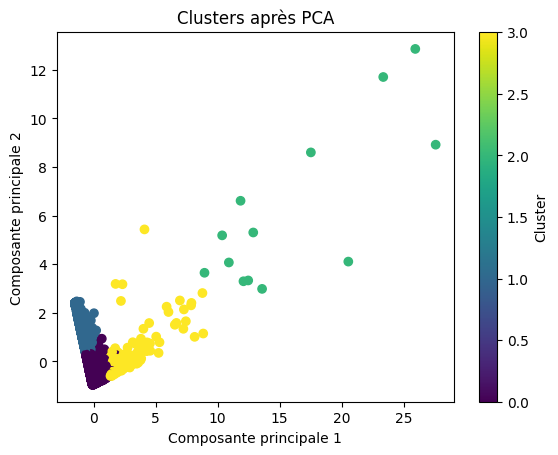

In [13]:
from sklearn.decomposition import PCA

# Réduction de dimension à 2 dimensions pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualiser les clusters dans l'espace réduit
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customer_data["Cluster"], cmap='viridis')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Clusters après PCA')
plt.colorbar(label='Cluster')
plt.show()


Étape 5 : Analyse et Interprétation des Segments


Étape 5.1 : Analyse des segments
Calculer les moyennes et les statistiques clés pour chaque cluster.
Comprendre les différences entre les groupes en termes de TotalSpent, Frequency, et Recency.


In [14]:
# Analyse des clusters
cluster_analysis = customer_data.groupby("Cluster").agg(
    AverageSpent=("TotalSpent", "mean"),
    AverageFrequency=("Frequency", "mean"),
    AverageRecency=("Recency", "mean"),
    ClusterSize=("CustomerID", "count")  # Nombre de clients dans chaque cluster
).reset_index()

print("Analyse des segments :")
print(cluster_analysis)


Analyse des segments :
   Cluster   AverageSpent  AverageFrequency  AverageRecency  ClusterSize
0        0    1359.049284          3.682711       43.702685         3054
1        1     480.617480          1.552015      248.075914         1067
2        2  127338.313846         82.538462        7.384615           13
3        3   12709.090490         22.333333       15.500000          204


Étape 5.2 : Profilage des segments
Identifier les caractéristiques de chaque groupe (exemple : clients récents et dépensiers, clients inactifs, etc.).
Formuler des hypothèses et des recommandations spécifiques pour chaque segment.

In [15]:
# Profil des segments
for cluster in cluster_analysis["Cluster"]:
    print(f"\nProfil du Cluster {cluster}:")
    cluster_data = customer_data[customer_data["Cluster"] == cluster]
    print(f"Nombre de clients : {len(cluster_data)}")
    print(f"Dépense moyenne : {cluster_analysis.loc[cluster, 'AverageSpent']:.2f}")
    print(f"Fréquence moyenne : {cluster_analysis.loc[cluster, 'AverageFrequency']:.2f}")
    print(f"Récence moyenne (jours) : {cluster_analysis.loc[cluster, 'AverageRecency']:.2f}")



Profil du Cluster 0:
Nombre de clients : 3054
Dépense moyenne : 1359.05
Fréquence moyenne : 3.68
Récence moyenne (jours) : 43.70

Profil du Cluster 1:
Nombre de clients : 1067
Dépense moyenne : 480.62
Fréquence moyenne : 1.55
Récence moyenne (jours) : 248.08

Profil du Cluster 2:
Nombre de clients : 13
Dépense moyenne : 127338.31
Fréquence moyenne : 82.54
Récence moyenne (jours) : 7.38

Profil du Cluster 3:
Nombre de clients : 204
Dépense moyenne : 12709.09
Fréquence moyenne : 22.33
Récence moyenne (jours) : 15.50


Cluster 0 : Clients modérés

Nombre de clients : 3054 (groupe le plus important).

Dépense moyenne : 1359.05.

Fréquence moyenne : 3.68 (faible fréquence d’achat).

Récence moyenne : 43.70 jours (relativement récents).

Interprétation : Ces clients achètent occasionnellement avec des
dépenses modérées. Ils représentent une base importante mais peu engagée.

Recommandations :

Encourager ces clients à acheter plus fréquemment avec des promotions ou des offres groupées.
Lancer des campagnes personnalisées basées sur leurs précédents achats.

Cluster 1 : Clients inactifs

Nombre de clients : 1067.

Dépense moyenne : 480.62 (la plus basse parmi les clusters).

Fréquence moyenne : 1.55.

Récence moyenne : 248.08 jours (inactifs depuis longtemps).

Interprétation : Ces clients sont peu actifs avec de faibles dépenses. Ils représentent un segment difficile à engager.

Recommandations :

Lancer une campagne de réactivation avec des offres fortes (ex : remises importantes ou cadeaux).
Identifier pourquoi ces clients ont cessé d'acheter (problème de satisfaction, concurrence).

Cluster 2 : Clients VIP récents

Nombre de clients : 13 (le plus petit groupe).

Dépense moyenne : 127,338.31 (extrêmement élevé).

Fréquence moyenne : 82.54 (très fréquents).

Récence moyenne : 7.38 jours (très récents).

Interprétation : Ce sont vos meilleurs clients, avec des dépenses et une fréquence élevées. Ils sont très engagés.

Recommandations :

Instaurer un programme VIP ou de fidélité exclusif (offres spéciales, événements dédiés).
Maintenir leur engagement avec des expériences personnalisées (nouveaux produits, invitations spéciales).

Cluster 3 : Clients dépensiers réguliers

Nombre de clients : 204.

Dépense moyenne : 12,709.09.

Fréquence moyenne : 22.33.

Récence moyenne : 15.50 jours.

Interprétation : Ces clients dépensent beaucoup et achètent régulièrement. Ce sont des clients fidèles.

Recommandations :

Fidéliser davantage avec des programmes de récompenses (points de fidélité, offres exclusives).
Leur proposer des produits premium ou des bundles pour augmenter la valeur des transactions.